In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from transitfit import LightCurve, KeplerLightCurve, TransitModel

In [2]:
lc = KeplerLightCurve(1422, [1,2])
lc.save_hdf('test_lc.h5')
lc = LightCurve.load_hdf('test_lc.h5')

In [3]:
model = TransitModel(lc)

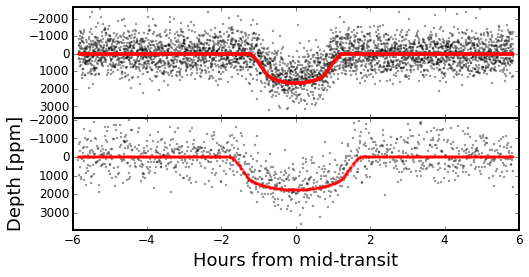

In [4]:
params = lc.default_params  #super-simple guesses for parameters
fig = model.plot_planets(params); #not bad!

In [5]:
model.lnpost(params)

-0.00089322093492889463

In [9]:
%timeit f = model(params) #evaluates ln(posterior)

10 loops, best of 3: 74.7 ms per loop


In [7]:
#fit = model.fit_leastsq(params, options={'disp':True})

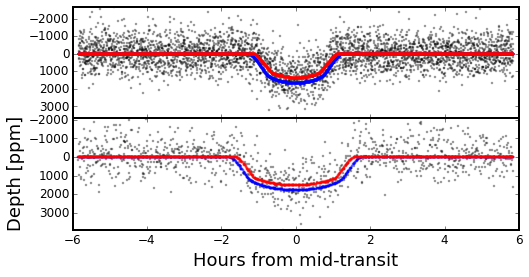

In [7]:
fig = model.plot_planets(lc.default_params, color='b'); 
fig = model.plot_planets(model._bestfit, color='r', fig=fig);

In [10]:
model.fit_emcee(nburn=3, niter=10); # mini-mcmc!

In [11]:
model.samples.head() #these are all still basically the starting params

,dilution,flux_zp,q1,q2,rho,period_1,epoch_1,b_1,rprs_1,ecc_1,omega_1,period_2,epoch_2,b_2,rprs_2,ecc_2,omega_2
0,0,1.009398,0.502761,0.507193,3.992553,6.032019,132.724181,0.507647,0.038129,0,0,20.058306,134.243456,0.495134,0.040462,0,0
1,0,1.016319,0.498419,0.510320,4.049243,6.040315,131.948847,0.511738,0.037399,0,0,20.264709,133.872695,0.489913,0.040816,0,0
2,0,1.004121,0.496261,0.528070,4.086205,5.893052,126.804139,0.517736,0.037518,0,0,19.830922,141.973053,0.484495,0.043638,0,0
3,0,0.991699,0.505483,0.538660,3.894315,5.898545,122.761655,0.531724,0.038591,0,0,19.750035,143.282266,0.497200,0.044340,0,0
4,0,0.991401,0.501452,0.537155,3.923072,5.892858,121.594016,0.544154,0.039171,0,0,19.356847,142.341262,0.494872,0.045222,0,0


In [12]:
model.save_hdf('test_model.h5')
model = TransitModel.load_hdf('test_model.h5')

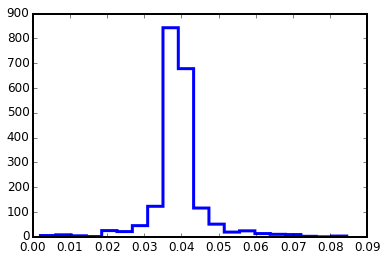

In [13]:
plt.hist(model.samples['rprs_2'], bins=20, histtype='step', lw=3); 

/Users/tdm/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2544: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


ValueError: It looks like at least one of your sample columns have no dynamic range. You could try using the `extent` argument.

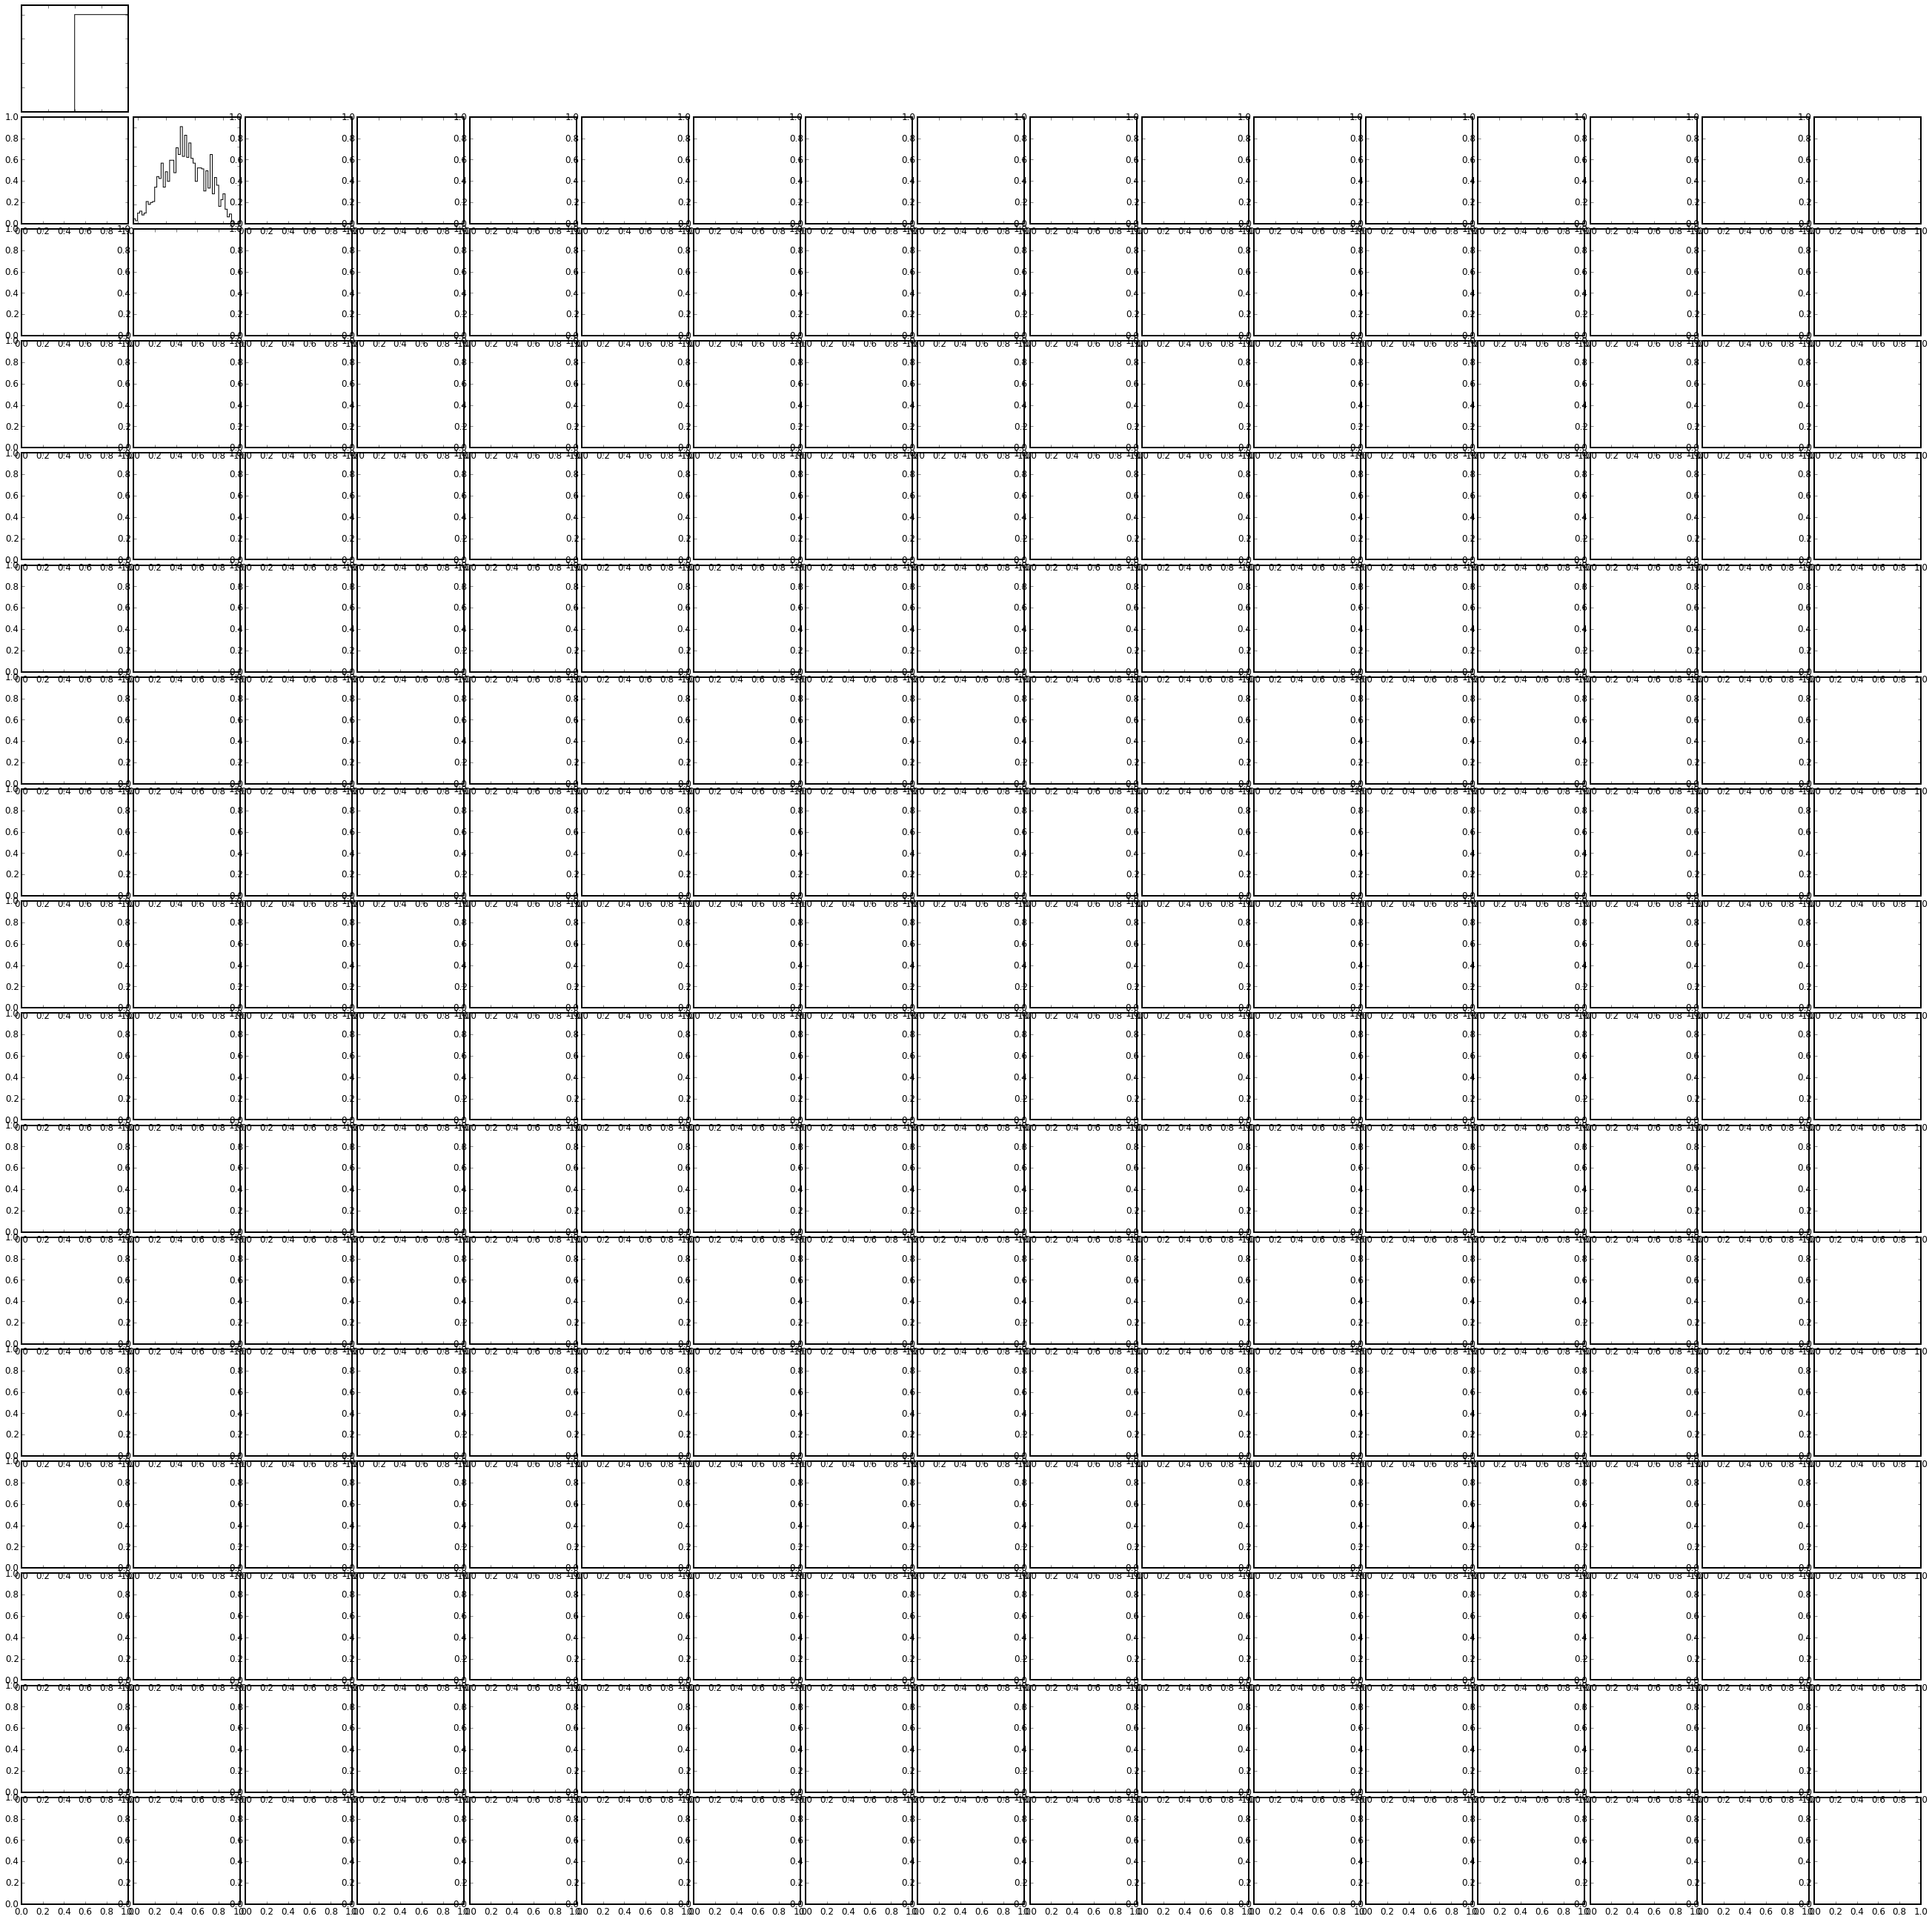

In [14]:
model.triangle()